## Needed imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import copy
from matplotlib.ticker import FormatStrFormatter
starttime = time.time()

## Static parameters

In [2]:
lst_eps = [16,8,5,4,3,2,1,0.5,0.1]
path_results = 'Results/' 
dataset='Synthetic1'
dataset1 = 'S_0.44' 
dataset2 = 'S_0.52'
dataset3 = 'S_0.6'

# Collecting the results for the no privacy setting (baseline)

In [3]:
setting = 'NoLDP'
noldp_dataset1 = pd.read_csv(path_results + dataset1 + '_' + setting + '_results.csv')
noldp_dataset2 = pd.read_csv(path_results + dataset2 + '_' + setting + '_results.csv')
noldp_dataset3 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results.csv')

In [4]:
#extracting the rows containing the std values
std_values_noldp1 = noldp_dataset1.loc[noldp_dataset1['Seed_num'] == 20]
std_values_noldp2 = noldp_dataset2.loc[noldp_dataset2['Seed_num'] == 20]
std_values_noldp3 = noldp_dataset3.loc[noldp_dataset3['Seed_num'] == 20]

In [5]:
# deleting the std row
noldp_dataset1 = noldp_dataset1[noldp_dataset1.Seed_num != 20]
noldp_dataset2 = noldp_dataset2[noldp_dataset2.Seed_num != 20]
noldp_dataset3 = noldp_dataset3[noldp_dataset3.Seed_num != 20]

In [6]:
# computing the mean of each fairness metric
# dataset 1
SP_maj_mean1 = noldp_dataset1.loc[:, 'SP_maj'].mean()
SP_min_mean1 = noldp_dataset1.loc[:, 'SP_min'].mean()
EO_maj_mean1 = noldp_dataset1.loc[:, 'EO_maj'].mean()
EO_min_mean1 = noldp_dataset1.loc[:, 'EO_min'].mean()
PE_maj_mean1 = noldp_dataset1.loc[:, 'PE_maj'].mean()
PE_min_mean1 = noldp_dataset1.loc[:, 'PE_min'].mean()
PRP_maj_mean1 = noldp_dataset1.loc[:, 'PRP_maj'].mean()
PRP_min_mean1 = noldp_dataset1.loc[:, 'PRP_min'].mean()
TE_maj_mean1 = noldp_dataset1.loc[:, 'TE_maj'].mean()
TE_min_mean1 = noldp_dataset1.loc[:, 'TE_min'].mean()
CSP_B0_maj_mean1 = noldp_dataset1.loc[:, 'CSP_B0_maj'].mean()
CSP_B0_min_mean1 = noldp_dataset1.loc[:, 'CSP_B0_min'].mean()
CSP_B1_maj_mean1 = noldp_dataset1.loc[:, 'CSP_B1_maj'].mean()
CSP_B1_min_mean1 = noldp_dataset1.loc[:, 'CSP_B1_min'].mean()
OA_maj_mean1 = noldp_dataset1.loc[:, 'OA_maj'].mean()
OA_min_mean1 = noldp_dataset1.loc[:, 'OA_min'].mean()
# dataset 2
SP_maj_mean2 = noldp_dataset2.loc[:, 'SP_maj'].mean()
SP_min_mean2 = noldp_dataset2.loc[:, 'SP_min'].mean()
EO_maj_mean2 = noldp_dataset2.loc[:, 'EO_maj'].mean()
EO_min_mean2 = noldp_dataset2.loc[:, 'EO_min'].mean()
PE_maj_mean2 = noldp_dataset2.loc[:, 'PE_maj'].mean()
PE_min_mean2 = noldp_dataset2.loc[:, 'PE_min'].mean()
PRP_maj_mean2 = noldp_dataset2.loc[:, 'PRP_maj'].mean()
PRP_min_mean2 = noldp_dataset2.loc[:, 'PRP_min'].mean()
TE_maj_mean2 = noldp_dataset2.loc[:, 'TE_maj'].mean()
TE_min_mean2 = noldp_dataset2.loc[:, 'TE_min'].mean()
CSP_B0_maj_mean2 = noldp_dataset2.loc[:, 'CSP_B0_maj'].mean()
CSP_B0_min_mean2 = noldp_dataset2.loc[:, 'CSP_B0_min'].mean()
CSP_B1_maj_mean2 = noldp_dataset2.loc[:, 'CSP_B1_maj'].mean()
CSP_B1_min_mean2 = noldp_dataset2.loc[:, 'CSP_B1_min'].mean()
OA_maj_mean2 = noldp_dataset2.loc[:, 'OA_maj'].mean()
OA_min_mean2 = noldp_dataset2.loc[:, 'OA_min'].mean()
# dataset 3
SP_maj_mean3 = noldp_dataset3.loc[:, 'SP_maj'].mean()
SP_min_mean3 = noldp_dataset3.loc[:, 'SP_min'].mean()
EO_maj_mean3 = noldp_dataset3.loc[:, 'EO_maj'].mean()
EO_min_mean3 = noldp_dataset3.loc[:, 'EO_min'].mean()
PE_maj_mean3 = noldp_dataset3.loc[:, 'PE_maj'].mean()
PE_min_mean3 = noldp_dataset3.loc[:, 'PE_min'].mean()
PRP_maj_mean3 = noldp_dataset3.loc[:, 'PRP_maj'].mean()
PRP_min_mean3 = noldp_dataset3.loc[:, 'PRP_min'].mean()
TE_maj_mean3 = noldp_dataset3.loc[:, 'TE_maj'].mean()
TE_min_mean3 = noldp_dataset3.loc[:, 'TE_min'].mean()
CSP_B0_maj_mean3 = noldp_dataset3.loc[:, 'CSP_B0_maj'].mean()
CSP_B0_min_mean3 = noldp_dataset3.loc[:, 'CSP_B0_min'].mean()
CSP_B1_maj_mean3 = noldp_dataset3.loc[:, 'CSP_B1_maj'].mean()
CSP_B1_min_mean3 = noldp_dataset3.loc[:, 'CSP_B1_min'].mean()
OA_maj_mean3 = noldp_dataset3.loc[:, 'OA_maj'].mean()
OA_min_mean3 = noldp_dataset3.loc[:, 'OA_min'].mean()

# Collecting the results of the LDP setting 1: only the protected attribute is obfuscated

In [7]:
setting = 'sLDP'
sldp_dataset1 = pd.read_csv(path_results + dataset1 + '_' + setting + '_results.csv')
sldp_dataset2 = pd.read_csv(path_results + dataset2 + '_' + setting + '_results.csv')
sldp_dataset3 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results.csv')

In [8]:
#extracting the rows containing the std values
std_values_sldp1 = sldp_dataset1.loc[sldp_dataset1['Seed_num'] == 20]
std_values_sldp2 = sldp_dataset2.loc[sldp_dataset2['Seed_num'] == 20]
std_values_sldp3 = sldp_dataset1.loc[sldp_dataset3['Seed_num'] == 20]

In [9]:
# deleting the std row
sldp_dataset1 = sldp_dataset1[sldp_dataset1.Seed_num != 20]
sldp_dataset2 = sldp_dataset2[sldp_dataset2.Seed_num != 20]
sldp_dataset3 = sldp_dataset3[sldp_dataset3.Seed_num != 20]

In [10]:
#splitting the csv file using epsilon as splitting condition
df_by_eps_dataset1 = [y for x, y in sldp_dataset1.groupby('epsilon')]
df_by_eps_dataset2 = [y for x, y in sldp_dataset2.groupby('epsilon')]
df_by_eps_dataset3 = [y for x, y in sldp_dataset3.groupby('epsilon')]

In [11]:
# dataset1
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
sldp_sp_maj1, sldp_sp_min1, sldp_spd1 = [], [], []
sldp_eo_maj1, sldp_eo_min1, sldp_eod1 = [], [], []
sldp_pe_maj1, sldp_pe_min1, sldp_ped1 = [], [], []
sldp_prp_maj1, sldp_prp_min1, sldp_prpd1 = [], [], []
sldp_te_maj1, sldp_te_min1, sldp_ted1 = [], [], []
sldp_oa_maj1, sldp_oa_min1, sldp_oad1 = [], [], []
sldp_csp_b0_maj1, sldp_csp_b0_min1, sldp_csd_b01 = [], [], []
sldp_csp_b1_maj1, sldp_csp_b1_min1, sldp_csd_b11 = [], [], []
sldp_acc1 = []
for df in df_by_eps_dataset1[::-1]:
    sldp_sp_maj1.append(np.mean(df['SP_maj']))
    sldp_sp_min1.append(np.mean(df['SP_min']))
    sldp_spd1.append(np.mean(df['SPD']))
    sldp_eo_maj1.append(np.mean(df['EO_maj']))
    sldp_eo_min1.append(np.mean(df['EO_min']))
    sldp_eod1.append(np.mean(df['EOD']))
    sldp_pe_maj1.append(np.mean(df['PE_maj']))
    sldp_pe_min1.append(np.mean(df['PE_min']))
    sldp_ped1.append(np.mean(df['PED']))
    sldp_prp_maj1.append(np.mean(df['PRP_maj']))
    sldp_prp_min1.append(np.mean(df['PRP_min']))
    sldp_prpd1.append(np.mean(df['PRPD']))
    sldp_te_maj1.append(np.mean(df['TE_maj']))
    sldp_te_min1.append(np.mean(df['TE_min']))
    sldp_ted1.append(np.mean(df['TED']))
    sldp_oa_maj1.append(np.mean(df['OA_maj']))
    sldp_oa_min1.append(np.mean(df['OA_min']))
    sldp_oad1.append(np.mean(df['OAD']))
    sldp_csp_b0_maj1.append(np.mean(df['CSP_B0_maj']))
    sldp_csp_b0_min1.append(np.mean(df['CSP_B0_min']))
    sldp_csd_b01.append(np.mean(df['CSD_B0']))
    sldp_csp_b1_maj1.append(np.mean(df['CSP_B1_maj']))
    sldp_csp_b1_min1.append(np.mean(df['CSP_B1_min']))
    sldp_csd_b11.append(np.mean(df['CSD_B1']))
    sldp_acc1.append(np.mean(df['Acc']))

In [12]:
# dataset2
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
sldp_sp_maj2, sldp_sp_min2, sldp_spd2 = [], [], []
sldp_eo_maj2, sldp_eo_min2, sldp_eod2 = [], [], []
sldp_pe_maj2, sldp_pe_min2, sldp_ped2 = [], [], []
sldp_prp_maj2, sldp_prp_min2, sldp_prpd2 = [], [], []
sldp_te_maj2, sldp_te_min2, sldp_ted2 = [], [], []
sldp_oa_maj2, sldp_oa_min2, sldp_oad2 = [], [], []
sldp_csp_b0_maj2, sldp_csp_b0_min2, sldp_csd_b02 = [], [], []
sldp_csp_b1_maj2, sldp_csp_b1_min2, sldp_csd_b12 = [], [], []
sldp_acc2 = []
for df in df_by_eps_dataset2[::-1]:
    sldp_sp_maj2.append(np.mean(df['SP_maj']))
    sldp_sp_min2.append(np.mean(df['SP_min']))
    sldp_spd2.append(np.mean(df['SPD']))
    sldp_eo_maj2.append(np.mean(df['EO_maj']))
    sldp_eo_min2.append(np.mean(df['EO_min']))
    sldp_eod2.append(np.mean(df['EOD']))
    sldp_pe_maj2.append(np.mean(df['PE_maj']))
    sldp_pe_min2.append(np.mean(df['PE_min']))
    sldp_ped2.append(np.mean(df['PED']))
    sldp_prp_maj2.append(np.mean(df['PRP_maj']))
    sldp_prp_min2.append(np.mean(df['PRP_min']))
    sldp_prpd2.append(np.mean(df['PRPD']))
    sldp_te_maj2.append(np.mean(df['TE_maj']))
    sldp_te_min2.append(np.mean(df['TE_min']))
    sldp_ted2.append(np.mean(df['TED']))
    sldp_oa_maj2.append(np.mean(df['OA_maj']))
    sldp_oa_min2.append(np.mean(df['OA_min']))
    sldp_oad2.append(np.mean(df['OAD']))
    sldp_csp_b0_maj2.append(np.mean(df['CSP_B0_maj']))
    sldp_csp_b0_min2.append(np.mean(df['CSP_B0_min']))
    sldp_csd_b02.append(np.mean(df['CSD_B0']))
    sldp_csp_b1_maj2.append(np.mean(df['CSP_B1_maj']))
    sldp_csp_b1_min2.append(np.mean(df['CSP_B1_min']))
    sldp_csd_b12.append(np.mean(df['CSD_B1']))
    sldp_acc2.append(np.mean(df['Acc']))

In [13]:
# dataset3
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
sldp_sp_maj3, sldp_sp_min3, sldp_spd3 = [], [], []
sldp_eo_maj3, sldp_eo_min3, sldp_eod3 = [], [], []
sldp_pe_maj3, sldp_pe_min3, sldp_ped3 = [], [], []
sldp_prp_maj3, sldp_prp_min3, sldp_prpd3 = [], [], []
sldp_te_maj3, sldp_te_min3, sldp_ted3 = [], [], []
sldp_oa_maj3, sldp_oa_min3, sldp_oad3 = [], [], []
sldp_csp_b0_maj3, sldp_csp_b0_min3, sldp_csd_b03 = [], [], []
sldp_csp_b1_maj3, sldp_csp_b1_min3, sldp_csd_b13 = [], [], []
sldp_acc3 = []
for df in df_by_eps_dataset3[::-1]:
    sldp_sp_maj3.append(np.mean(df['SP_maj']))
    sldp_sp_min3.append(np.mean(df['SP_min']))
    sldp_spd3.append(np.mean(df['SPD']))
    sldp_eo_maj3.append(np.mean(df['EO_maj']))
    sldp_eo_min3.append(np.mean(df['EO_min']))
    sldp_eod3.append(np.mean(df['EOD']))
    sldp_pe_maj3.append(np.mean(df['PE_maj']))
    sldp_pe_min3.append(np.mean(df['PE_min']))
    sldp_ped3.append(np.mean(df['PED']))
    sldp_prp_maj3.append(np.mean(df['PRP_maj']))
    sldp_prp_min3.append(np.mean(df['PRP_min']))
    sldp_prpd3.append(np.mean(df['PRPD']))
    sldp_te_maj3.append(np.mean(df['TE_maj']))
    sldp_te_min3.append(np.mean(df['TE_min']))
    sldp_ted3.append(np.mean(df['TED']))
    sldp_oa_maj3.append(np.mean(df['OA_maj']))
    sldp_oa_min3.append(np.mean(df['OA_min']))
    sldp_oad3.append(np.mean(df['OAD']))
    sldp_csp_b0_maj3.append(np.mean(df['CSP_B0_maj']))
    sldp_csp_b0_min3.append(np.mean(df['CSP_B0_min']))
    sldp_csd_b03.append(np.mean(df['CSD_B0']))
    sldp_csp_b1_maj3.append(np.mean(df['CSP_B1_maj']))
    sldp_csp_b1_min3.append(np.mean(df['CSP_B1_min']))
    sldp_csd_b13.append(np.mean(df['CSD_B1']))
    sldp_acc3.append(np.mean(df['Acc']))

# Collecting the results of the LDP setting 2: allsLDP combined

In [14]:
setting = 'combsLDP'
allsldp_dataset1 = pd.read_csv(path_results + dataset1 + '_' + setting + '_results.csv')
allsldp_dataset2 = pd.read_csv(path_results + dataset2 + '_' + setting + '_results.csv')
allsldp_dataset3 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results.csv')

In [15]:
#extracting the rows containing the std values
std_values_comldp1 = allsldp_dataset1.loc[allsldp_dataset1['Seed_num'] == 20]
std_values_comldp2 = allsldp_dataset2.loc[allsldp_dataset2['Seed_num'] == 20]
std_values_comldp3 = allsldp_dataset3.loc[allsldp_dataset3['Seed_num'] == 20]

In [16]:
# deleting the std row
allsldp_dataset1 = allsldp_dataset1[allsldp_dataset1.Seed_num != 20]
allsldp_dataset2 = allsldp_dataset2[allsldp_dataset2.Seed_num != 20]
allsldp_dataset3 = allsldp_dataset3[allsldp_dataset3.Seed_num != 20]

In [17]:
#splitting the csv file using epsilon as splitting condition
df_by_eps_dataset1 = [y for x, y in allsldp_dataset1.groupby('epsilon')]
df_by_eps_dataset2 = [y for x, y in allsldp_dataset2.groupby('epsilon')]
df_by_eps_dataset3 = [y for x, y in allsldp_dataset3.groupby('epsilon')]

In [18]:
# dataset1
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
allsldp_sp_maj1, allsldp_sp_min1, allsldp_spd1 = [], [], []
allsldp_eo_maj1, allsldp_eo_min1, allsldp_eod1 = [], [], []
allsldp_pe_maj1, allsldp_pe_min1, allsldp_ped1 = [], [], []
allsldp_prp_maj1, allsldp_prp_min1, allsldp_prpd1 = [], [], []
allsldp_te_maj1, allsldp_te_min1, allsldp_ted1 = [], [], []
allsldp_oa_maj1, allsldp_oa_min1, allsldp_oad1 = [], [], []
allsldp_csp_b0_maj1, allsldp_csp_b0_min1, allsldp_csd_b01 = [], [], []
allsldp_csp_b1_maj1, allsldp_csp_b1_min1, allsldp_csd_b11 = [], [], []
allsldp_acc1 = []
for df in df_by_eps_dataset1[::-1]:
    allsldp_sp_maj1.append(np.mean(df['SP_maj']))
    allsldp_sp_min1.append(np.mean(df['SP_min']))
    allsldp_spd1.append(np.mean(df['SPD']))
    allsldp_eo_maj1.append(np.mean(df['EO_maj']))
    allsldp_eo_min1.append(np.mean(df['EO_min']))
    allsldp_eod1.append(np.mean(df['EOD']))
    allsldp_pe_maj1.append(np.mean(df['PE_maj']))
    allsldp_pe_min1.append(np.mean(df['PE_min']))
    allsldp_ped1.append(np.mean(df['PED']))
    allsldp_prp_maj1.append(np.mean(df['PRP_maj']))
    allsldp_prp_min1.append(np.mean(df['PRP_min']))
    allsldp_prpd1.append(np.mean(df['PRPD']))
    allsldp_te_maj1.append(np.mean(df['TE_maj']))
    allsldp_te_min1.append(np.mean(df['TE_min']))
    allsldp_ted1.append(np.mean(df['TED']))
    allsldp_oa_maj1.append(np.mean(df['OA_maj']))
    allsldp_oa_min1.append(np.mean(df['OA_min']))
    allsldp_oad1.append(np.mean(df['OAD']))
    allsldp_csp_b0_maj1.append(np.mean(df['CSP_B0_maj']))
    allsldp_csp_b0_min1.append(np.mean(df['CSP_B0_min']))
    allsldp_csd_b01.append(np.mean(df['CSD_B0']))
    allsldp_csp_b1_maj1.append(np.mean(df['CSP_B1_maj']))
    allsldp_csp_b1_min1.append(np.mean(df['CSP_B1_min']))
    allsldp_csd_b11.append(np.mean(df['CSD_B1']))
    allsldp_acc1.append(np.mean(df['Acc']))

In [19]:
# dataset2
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
allsldp_sp_maj2, allsldp_sp_min2, allsldp_spd2 = [], [], []
allsldp_eo_maj2, allsldp_eo_min2, allsldp_eod2 = [], [], []
allsldp_pe_maj2, allsldp_pe_min2, allsldp_ped2 = [], [], []
allsldp_prp_maj2, allsldp_prp_min2, allsldp_prpd2 = [], [], []
allsldp_te_maj2, allsldp_te_min2, allsldp_ted2 = [], [], []
allsldp_oa_maj2, allsldp_oa_min2, allsldp_oad2 = [], [], []
allsldp_csp_b0_maj2, allsldp_csp_b0_min2, allsldp_csd_b02 = [], [], []
allsldp_csp_b1_maj2, allsldp_csp_b1_min2, allsldp_csd_b12 = [], [], []
allsldp_acc2 = []
for df in df_by_eps_dataset2[::-1]:
    allsldp_sp_maj2.append(np.mean(df['SP_maj']))
    allsldp_sp_min2.append(np.mean(df['SP_min']))
    allsldp_spd2.append(np.mean(df['SPD']))
    allsldp_eo_maj2.append(np.mean(df['EO_maj']))
    allsldp_eo_min2.append(np.mean(df['EO_min']))
    allsldp_eod2.append(np.mean(df['EOD']))
    allsldp_pe_maj2.append(np.mean(df['PE_maj']))
    allsldp_pe_min2.append(np.mean(df['PE_min']))
    allsldp_ped2.append(np.mean(df['PED']))
    allsldp_prp_maj2.append(np.mean(df['PRP_maj']))
    allsldp_prp_min2.append(np.mean(df['PRP_min']))
    allsldp_prpd2.append(np.mean(df['PRPD']))
    allsldp_te_maj2.append(np.mean(df['TE_maj']))
    allsldp_te_min2.append(np.mean(df['TE_min']))
    allsldp_ted2.append(np.mean(df['TED']))
    allsldp_oa_maj2.append(np.mean(df['OA_maj']))
    allsldp_oa_min2.append(np.mean(df['OA_min']))
    allsldp_oad2.append(np.mean(df['OAD']))
    allsldp_csp_b0_maj2.append(np.mean(df['CSP_B0_maj']))
    allsldp_csp_b0_min2.append(np.mean(df['CSP_B0_min']))
    allsldp_csd_b02.append(np.mean(df['CSD_B0']))
    allsldp_csp_b1_maj2.append(np.mean(df['CSP_B1_maj']))
    allsldp_csp_b1_min2.append(np.mean(df['CSP_B1_min']))
    allsldp_csd_b12.append(np.mean(df['CSD_B1']))
    allsldp_acc2.append(np.mean(df['Acc']))

In [20]:
# dataset3
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
allsldp_sp_maj3, allsldp_sp_min3, allsldp_spd3 = [], [], []
allsldp_eo_maj3, allsldp_eo_min3, allsldp_eod3 = [], [], []
allsldp_pe_maj3,allsldp_pe_min3, allsldp_ped3 = [], [], []
allsldp_prp_maj3, allsldp_prp_min3, allsldp_prpd3 = [], [], []
allsldp_te_maj3, allsldp_te_min3, allsldp_ted3 = [], [], []
allsldp_oa_maj3, allsldp_oa_min3, allsldp_oad3 = [], [], []
allsldp_csp_b0_maj3, allsldp_csp_b0_min3, allsldp_csd_b03 = [], [], []
allsldp_csp_b1_maj3, allsldp_csp_b1_min3, allsldp_csd_b13 = [], [], []
allsldp_acc3 = []
for df in df_by_eps_dataset3[::-1]:
    allsldp_sp_maj3.append(np.mean(df['SP_maj']))
    allsldp_sp_min3.append(np.mean(df['SP_min']))
    allsldp_spd3.append(np.mean(df['SPD']))
    allsldp_eo_maj3.append(np.mean(df['EO_maj']))
    allsldp_eo_min3.append(np.mean(df['EO_min']))
    allsldp_eod3.append(np.mean(df['EOD']))
    allsldp_pe_maj3.append(np.mean(df['PE_maj']))
    allsldp_pe_min3.append(np.mean(df['PE_min']))
    allsldp_ped3.append(np.mean(df['PED']))
    allsldp_prp_maj3.append(np.mean(df['PRP_maj']))
    allsldp_prp_min3.append(np.mean(df['PRP_min']))
    allsldp_prpd3.append(np.mean(df['PRPD']))
    allsldp_te_maj3.append(np.mean(df['TE_maj']))
    allsldp_te_min3.append(np.mean(df['TE_min']))
    allsldp_ted3.append(np.mean(df['TED']))
    allsldp_oa_maj3.append(np.mean(df['OA_maj']))
    allsldp_oa_min3.append(np.mean(df['OA_min']))
    allsldp_oad3.append(np.mean(df['OAD']))
    allsldp_csp_b0_maj3.append(np.mean(df['CSP_B0_maj']))
    allsldp_csp_b0_min3.append(np.mean(df['CSP_B0_min']))
    allsldp_csd_b03.append(np.mean(df['CSD_B0']))
    allsldp_csp_b1_maj3.append(np.mean(df['CSP_B1_maj']))
    allsldp_csp_b1_min3.append(np.mean(df['CSP_B1_min']))
    allsldp_csd_b13.append(np.mean(df['CSD_B1']))
    allsldp_acc3.append(np.mean(df['Acc']))

# Collecting the results of the LDP setting 3: allsLDP indep

In [21]:
setting = 'indsLDP'
indldp_dataset1 = pd.read_csv(path_results + dataset1 + '_' + setting + '_results.csv')
indldp_dataset2 = pd.read_csv(path_results + dataset2 + '_' + setting + '_results.csv')
indldp_dataset3 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results.csv')

In [22]:
#extracting the rows containing the std values
std_values_indldp1 = indldp_dataset1.loc[indldp_dataset1['Seed_num'] == 20]
std_values_indldp2 = indldp_dataset2.loc[indldp_dataset2['Seed_num'] == 20]
std_values_indldp3 = indldp_dataset3.loc[indldp_dataset3['Seed_num'] == 20]

In [23]:
# deleting the std row
indldp_dataset1 = indldp_dataset1[indldp_dataset1.Seed_num != 20]
indldp_dataset2 = indldp_dataset2[indldp_dataset2.Seed_num != 20]
indldp_dataset3 = indldp_dataset3[indldp_dataset3.Seed_num != 20]

In [24]:
#splitting the csv file using epsilon as splitting condition
df_by_eps_dataset1 = [y for x, y in indldp_dataset1.groupby('epsilon')]
df_by_eps_dataset2 = [y for x, y in indldp_dataset2.groupby('epsilon')]
df_by_eps_dataset3 = [y for x, y in indldp_dataset3.groupby('epsilon')]

In [25]:
# dataset1
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
ldp_ind_sp_maj1, ldp_ind_sp_min1, ldp_ind_spd1 = [], [], []
ldp_ind_eo_maj1, ldp_ind_eo_min1, ldp_ind_eod1 = [], [], []
ldp_ind_pe_maj1, ldp_ind_pe_min1, ldp_ind_ped1 = [], [], []
ldp_ind_prp_maj1, ldp_ind_prp_min1, ldp_ind_prpd1 = [], [], []
ldp_ind_te_maj1, ldp_ind_te_min1, ldp_ind_ted1 = [], [], []
ldp_ind_oa_maj1, ldp_ind_oa_min1, ldp_ind_oad1 = [], [], []
ldp_ind_csp_b0_maj1, ldp_ind_csp_b0_min1, ldp_ind_csd_b01 = [], [], []
ldp_ind_csp_b1_maj1, ldp_ind_csp_b1_min1, ldp_ind_csd_b11 = [], [], []
ldp_ind_acc1 = []
for df in df_by_eps_dataset1[::-1]:
    ldp_ind_sp_maj1.append(np.mean(df['SP_maj']))
    ldp_ind_sp_min1.append(np.mean(df['SP_min']))
    ldp_ind_spd1.append(np.mean(df['SPD']))
    ldp_ind_eo_maj1.append(np.mean(df['EO_maj']))
    ldp_ind_eo_min1.append(np.mean(df['EO_min']))
    ldp_ind_eod1.append(np.mean(df['EOD']))
    ldp_ind_pe_maj1.append(np.mean(df['PE_maj']))
    ldp_ind_pe_min1.append(np.mean(df['PE_min']))
    ldp_ind_ped1.append(np.mean(df['PED']))
    ldp_ind_prp_maj1.append(np.mean(df['PRP_maj']))
    ldp_ind_prp_min1.append(np.mean(df['PRP_min']))
    ldp_ind_prpd1.append(np.mean(df['PRPD']))
    ldp_ind_te_maj1.append(np.mean(df['TE_maj']))
    ldp_ind_te_min1.append(np.mean(df['TE_min']))
    ldp_ind_ted1.append(np.mean(df['TED']))
    ldp_ind_oa_maj1.append(np.mean(df['OA_maj']))
    ldp_ind_oa_min1.append(np.mean(df['OA_min']))
    ldp_ind_oad1.append(np.mean(df['OAD']))
    ldp_ind_csp_b0_maj1.append(np.mean(df['CSP_B0_maj']))
    ldp_ind_csp_b0_min1.append(np.mean(df['CSP_B0_min']))
    ldp_ind_csd_b01.append(np.mean(df['CSD_B0']))
    ldp_ind_csp_b1_maj1.append(np.mean(df['CSP_B1_maj']))
    ldp_ind_csp_b1_min1.append(np.mean(df['CSP_B1_min']))
    ldp_ind_csd_b11.append(np.mean(df['CSD_B1']))
    ldp_ind_acc1.append(np.mean(df['Acc']))

In [26]:
# dataset2
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
ldp_ind_sp_maj2, ldp_ind_sp_min2, ldp_ind_spd2 = [], [], []
ldp_ind_eo_maj2, ldp_ind_eo_min2, ldp_ind_eod2 = [], [], []
ldp_ind_pe_maj2, ldp_ind_pe_min2, ldp_ind_ped2 = [], [], []
ldp_ind_prp_maj2, ldp_ind_prp_min2, ldp_ind_prpd2 = [], [], []
ldp_ind_te_maj2, ldp_ind_te_min2, ldp_ind_ted2 = [], [], []
ldp_ind_oa_maj2, ldp_ind_oa_min2, ldp_ind_oad2 = [], [], []
ldp_ind_csp_b0_maj2, ldp_ind_csp_b0_min2, ldp_ind_csd_b02 = [], [], []
ldp_ind_csp_b1_maj2, ldp_ind_csp_b1_min2, ldp_ind_csd_b12 = [], [], []
ldp_ind_acc2 = []
for df in df_by_eps_dataset2[::-1]:
    ldp_ind_sp_maj2.append(np.mean(df['SP_maj']))
    ldp_ind_sp_min2.append(np.mean(df['SP_min']))
    ldp_ind_spd2.append(np.mean(df['SPD']))
    ldp_ind_eo_maj2.append(np.mean(df['EO_maj']))
    ldp_ind_eo_min2.append(np.mean(df['EO_min']))
    ldp_ind_eod2.append(np.mean(df['EOD']))
    ldp_ind_pe_maj2.append(np.mean(df['PE_maj']))
    ldp_ind_pe_min2.append(np.mean(df['PE_min']))
    ldp_ind_ped2.append(np.mean(df['PED']))
    ldp_ind_prp_maj2.append(np.mean(df['PRP_maj']))
    ldp_ind_prp_min2.append(np.mean(df['PRP_min']))
    ldp_ind_prpd2.append(np.mean(df['PRPD']))
    ldp_ind_te_maj2.append(np.mean(df['TE_maj']))
    ldp_ind_te_min2.append(np.mean(df['TE_min']))
    ldp_ind_ted2.append(np.mean(df['TED']))
    ldp_ind_oa_maj2.append(np.mean(df['OA_maj']))
    ldp_ind_oa_min2.append(np.mean(df['OA_min']))
    ldp_ind_oad2.append(np.mean(df['OAD']))
    ldp_ind_csp_b0_maj2.append(np.mean(df['CSP_B0_maj']))
    ldp_ind_csp_b0_min2.append(np.mean(df['CSP_B0_min']))
    ldp_ind_csd_b02.append(np.mean(df['CSD_B0']))
    ldp_ind_csp_b1_maj2.append(np.mean(df['CSP_B1_maj']))
    ldp_ind_csp_b1_min2.append(np.mean(df['CSP_B1_min']))
    ldp_ind_csd_b12.append(np.mean(df['CSD_B1']))
    ldp_ind_acc2.append(np.mean(df['Acc']))

In [27]:
# dataset3
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
ldp_ind_sp_maj3, ldp_ind_sp_min3, ldp_ind_spd3 = [], [], []
ldp_ind_eo_maj3, ldp_ind_eo_min3, ldp_ind_eod3 = [], [], []
ldp_ind_pe_maj3,ldp_ind_pe_min3, ldp_ind_ped3 = [], [], []
ldp_ind_prp_maj3, ldp_ind_prp_min3, ldp_ind_prpd3 = [], [], []
ldp_ind_te_maj3, ldp_ind_te_min3, ldp_ind_ted3 = [], [], []
ldp_ind_oa_maj3, ldp_ind_oa_min3, ldp_ind_oad3 = [], [], []
ldp_ind_csp_b0_maj3, ldp_ind_csp_b0_min3, ldp_ind_csd_b03 = [], [], []
ldp_ind_csp_b1_maj3, ldp_ind_csp_b1_min3, ldp_ind_csd_b13 = [], [], []
ldp_ind_acc3 = []
for df in df_by_eps_dataset3[::-1]:
    ldp_ind_sp_maj3.append(np.mean(df['SP_maj']))
    ldp_ind_sp_min3.append(np.mean(df['SP_min']))
    ldp_ind_spd3.append(np.mean(df['SPD']))
    ldp_ind_eo_maj3.append(np.mean(df['EO_maj']))
    ldp_ind_eo_min3.append(np.mean(df['EO_min']))
    ldp_ind_eod3.append(np.mean(df['EOD']))
    ldp_ind_pe_maj3.append(np.mean(df['PE_maj']))
    ldp_ind_pe_min3.append(np.mean(df['PE_min']))
    ldp_ind_ped3.append(np.mean(df['PED']))
    ldp_ind_prp_maj3.append(np.mean(df['PRP_maj']))
    ldp_ind_prp_min3.append(np.mean(df['PRP_min']))
    ldp_ind_prpd3.append(np.mean(df['PRPD']))
    ldp_ind_te_maj3.append(np.mean(df['TE_maj']))
    ldp_ind_te_min3.append(np.mean(df['TE_min']))
    ldp_ind_ted3.append(np.mean(df['TED']))
    ldp_ind_oa_maj3.append(np.mean(df['OA_maj']))
    ldp_ind_oa_min3.append(np.mean(df['OA_min']))
    ldp_ind_oad3.append(np.mean(df['OAD']))
    ldp_ind_csp_b0_maj3.append(np.mean(df['CSP_B0_maj']))
    ldp_ind_csp_b0_min3.append(np.mean(df['CSP_B0_min']))
    ldp_ind_csd_b03.append(np.mean(df['CSD_B0']))
    ldp_ind_csp_b1_maj3.append(np.mean(df['CSP_B1_maj']))
    ldp_ind_csp_b1_min3.append(np.mean(df['CSP_B1_min']))
    ldp_ind_csd_b13.append(np.mean(df['CSD_B1']))
    ldp_ind_acc3.append(np.mean(df['Acc']))

## Displaying the results 

In [28]:
x = range(len(lst_eps))

1- Results for the first contribution: Impact of LDP on Fairness

In [69]:
def Make_subplots(lst_eps,dataset_name):    
    fig2, ax2 = plt.subplots(5, 2, figsize=(7, 7),sharex='col', sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    
    #Fairness metric 1: Statistical Parity   
        # sLDP:
    ax2[0,0].axhspan(SP_maj_mean1, SP_min_mean1, facecolor ='lightgrey', alpha = 0.4) 
    y3 = [(a,b) for a, b in zip(sldp_sp_maj1, sldp_sp_min1)]
    ax2[0,0].plot((x,x),([i for (i,j) in y3], [j for (i,j) in y3]),c='black')
    ax2[0,0].plot(x, [i for (i,j) in y3], 'ro', markersize = 4,label= r'$P[\hat{Y}=1|A=1]$')
    ax2[0,0].plot(x, [j for (i,j) in y3], 'bo', alpha = 0.4, markersize = 4,label= r'$P[\hat{Y}=1|A=0]$')
#         # multLDP:
    ax2[0,1].axhspan(SP_maj_mean1, SP_min_mean1, facecolor ='lightgrey', alpha = 0.4) 
    y4 = [(a,b) for a, b in zip( allsldp_sp_maj1, allsldp_sp_min1)] 
    ax2[0,1].plot((x,x),([i for (i,j) in y4], [j for (i,j) in y4]),c='black')
    ax2[0,1].plot(x, [i for (i,j) in y4], 'ro', markersize = 4,label= r'$P[\hat{Y}=1|A=a]$')
    ax2[0,1].plot(x, [j for (i,j) in y4], 'bo', alpha = 0.4, markersize = 4,label= r'$P[\hat{Y}=1|A=a]$')
    ax2[0,0].set_ylabel('SD',fontsize=12)
#     ax2[0,0].legend(bbox_to_anchor = (2.6,0.8) ,ncol=1,fontsize='8') 
   
    #Fairness metric 2: Equal Opportunity
#     # sLDP:
    ax2[1,0].axhspan(EO_maj_mean1, EO_min_mean1, facecolor ='lightgrey', alpha = 0.4) 
    y5 = [(a,b) for a, b in zip( sldp_eo_maj1, sldp_eo_min1)]
    ax2[1,0].plot((x,x),([i for (i,j) in y5], [j for (i,j) in y5]),c='black')
    ax2[1,0].plot(x, [i for (i,j) in y5], 'ro', markersize = 4,label=r'$P[\hat{Y}=1|Y=1,A=1]$')
    ax2[1,0].plot(x, [j for (i,j) in y5], 'bo', alpha = 0.4, markersize = 4,label=r'$P[\hat{Y}=1|Y=1,A=0]$')
    
#         # multLDP:
    ax2[1,1].axhspan(EO_maj_mean1, EO_min_mean1, facecolor ='lightgrey', alpha = 0.4) 
    y6 = [(a,b) for a, b in zip( allsldp_eo_maj1, allsldp_eo_min1)]
    ax2[1,1].plot((x,x),([i for (i,j) in y6], [j for (i,j) in y6]),c='black')
    ax2[1,1].plot(x, [i for (i,j) in y6], 'ro', markersize = 4,label=r'$P[\hat{Y}=1|Y=1,A=1]$')
    ax2[1,1].plot(x, [j for (i,j) in y6], 'bo', alpha = 0.4, markersize = 4,label=r'$P[\hat{Y}=1|Y=1,A=0]$')
#     ax2[1,1].legend(loc = 'upper right',bbox_to_anchor = (1.63,0.8) ,ncol=1,fontsize='8') 
    ax2[1,0].set_ylabel('EOD',fontsize=12)  
#     #Fairness metric 3: Predictive Equality
#     # sLDP:
    ax2[2,0].axhspan(PE_maj_mean1, PE_min_mean1, facecolor ='lightgrey', alpha = 0.4) 
    y7 = [(a,b) for a, b in zip( sldp_pe_maj1, sldp_pe_min1)]
    ax2[2,0].plot((x,x),([i for (i,j) in y7], [j for (i,j) in y7]),c='black')
    ax2[2,0].plot(x, [i for (i,j) in y7], 'ro', markersize = 4,label=r'$P[\hat{Y}=1|Y=0,A=1]$')
    ax2[2,0].plot(x, [j for (i,j) in y7], 'bo', alpha = 0.4, markersize = 4,label=r'$P[\hat{Y}=1|Y=0,A=0]$')
    
#         # multLDP:
    ax2[2,1].axhspan(PE_maj_mean1, PE_min_mean1, facecolor ='lightgrey', alpha = 0.4) 
    y8 = [(a,b) for a, b in zip( allsldp_pe_maj1, allsldp_pe_min1)]
    ax2[2,1].plot((x,x),([i for (i,j) in y8], [j for (i,j) in y8]),c='black')
    ax2[2,1].plot(x, [i for (i,j) in y8], 'ro', markersize = 4,label=r'$P[\hat{Y}=1|Y=0,A=1]$')
    ax2[2,1].plot(x, [j for (i,j) in y8], 'bo', alpha = 0.4, markersize = 4,label=r'$P[\hat{Y}=1|Y=0,A=0]$')
#     ax2[2,1].legend(loc = 'upper right',bbox_to_anchor = (1.63,0.8) ,ncol=1,fontsize='8') 
    ax2[2,0].set_ylabel('PED',fontsize=12)  
    #Fairness metric 4: Overall Accuracy
    # sLDP:
    ax2[3,0].axhspan(OA_maj_mean1, OA_min_mean1, facecolor ='lightgrey', alpha = 0.4) 
    y1 = [(a,b) for a, b in zip(sldp_oa_maj1, sldp_oa_min1)]
    ax2[3,0].plot((x,x),([i for (i,j) in y1], [j for (i,j) in y1]),c='black')
    ax2[3,0].plot(x, [i for (i,j) in y1], 'ro', markersize = 4,label=r'$P[\hat{Y}=Y|A=1]$')
    ax2[3,0].plot(x, [j for (i,j) in y1], 'bo', markersize = 4, alpha = 0.4, label=r'$P[\hat{Y}=Y|A=0]$')
    
    ax2[3,0].set_xticks(x,labels=lst_eps,fontsize=12) 
    
    # multLDP:
    ax2[3,1].axhspan(OA_maj_mean1, OA_min_mean1, facecolor ='lightgrey', alpha = 0.4) 
    y2 = [(a,b) for a, b in zip(allsldp_oa_maj1, allsldp_oa_min1)]
    ax2[3,1].plot((x,x),([i for (i,j) in y2], [j for (i,j) in y2]),c='black')
    ax2[3,1].plot(x, [i for (i,j) in y2], 'ro', markersize = 4,label=r'$P[\hat{Y}=Y|A=1]$')
    ax2[3,1].plot(x, [j for (i,j) in y2], 'bo', alpha = 0.4, markersize = 4,label=r'$P[\hat{Y}=Y|A=0]$')
#     ax2[3,1].legend(loc = 'upper right',bbox_to_anchor = (1.5,0.8) ,ncol=1,fontsize='8')
    ax2[3,1].set_xticks(x,labels=lst_eps,fontsize=12)
    ax2[3,0].set_ylabel('OAD',fontsize=12) 
    ax2[3,1].set_xticks(x,labels=lst_eps,fontsize=12)
    #Fairness metric 5: Predictive Parity
    # sLDP:
    ax2[4,0].axhspan(PRP_maj_mean1, PRP_min_mean1, facecolor ='lightgrey', alpha = 0.4) 
    y9 = [(a,b) for a, b in zip( sldp_prp_maj1, sldp_prp_min1)]
    ax2[4,0].plot((x,x),([i for (i,j) in y9], [j for (i,j) in y9]),c='black')
    ax2[4,0].plot(x, [i for (i,j) in y9], 'ro', markersize = 4,label=r'$P[Y=1|\hat{Y}=1]$,A=1]')
    ax2[4,0].plot(x, [j for (i,j) in y9], 'bo', alpha = 0.4, markersize = 4,label=r'$P[Y=1|\hat{Y}=1,A=0]$')
    
        # multLDP:
    ax2[4,1].axhspan(PRP_maj_mean1, PRP_min_mean1, facecolor ='lightgrey', alpha = 0.4) 
    y10 = [(a,b) for a, b in zip( allsldp_prp_maj1, allsldp_prp_min1)]
    ax2[4,1].plot((x,x),([i for (i,j) in y10], [j for (i,j) in y10]),c='black')
    ax2[4,1].plot(x, [i for (i,j) in y10], 'ro', markersize = 4,label=r'$P[Y=1|\hat{Y}=1]$,A=1]')
    ax2[4,1].plot(x, [j for (i,j) in y10], 'bo', alpha = 0.4, markersize = 4,label=r'$P[Y=1|\hat{Y}=1,A=0]$')
#     ax2[4,1].legend(loc = 'upper right',bbox_to_anchor = (1.63,0.8) ,ncol=1,fontsize='8') 
    ax2[4,0].set_ylabel('PRD',fontsize=12)  
        
    ax2[0,0].set_title('sLDP',fontsize=12)
    ax2[0,1].set_title('combLDP',fontsize=12)
    ax2[4,0].set_xlabel('$\epsilon$', fontsize=12)

    for j in range(2):
        ax2[4, j].set_xlabel('$\epsilon$', fontsize=12)      
    
    # saving the plot as a pdf file
    fig2.savefig(path_results + dataset + '_ldp_fairness_impact.pdf',dpi=100,bbox_inches='tight')
    
    
    return fig2.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:101: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


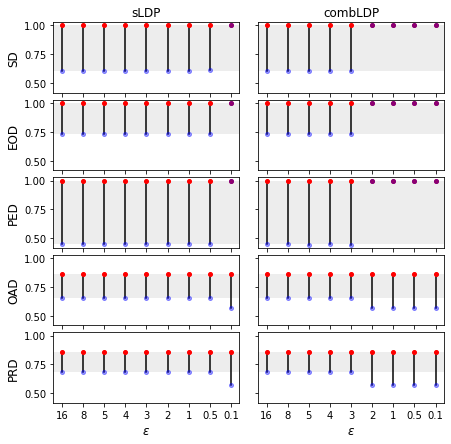

In [70]:
Make_subplots(lst_eps,'Synthetic1')

## Results for the second contribution: Combined versus Independent settings

In [65]:
def Make_subplots_2(lst_eps,dataset_name):    
    fig2, ax2 = plt.subplots(1, 5, figsize=(15, 3),sharex='col', sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.yticks(fontsize=9)
    ax2[0].axhline(y=SP_maj_mean2-SP_min_mean2, color='black', label = 'noLDP')
    ax2[0].errorbar(x,allsldp_spd2,std_values_comldp2['SPD'],color='forestgreen', ecolor='forestgreen',label='kRR-Comb',fmt='-o',markersize=3)
    ax2[0].errorbar(x,ldp_ind_spd2,std_values_indldp2['SPD'],ecolor='magenta',color='magenta',label='kRR-Ind',fmt='-o',markersize=3,alpha=0.6)            
    
    ax2[1].axhline(y=EO_maj_mean2-EO_min_mean2, color='black', label = 'noLDP')
    ax2[1].errorbar(x,allsldp_eod2,std_values_comldp2['EOD'],color='forestgreen', ecolor='forestgreen',label='kRR-Comb',fmt='-o',markersize=3)
    ax2[1].errorbar(x,ldp_ind_eod2,std_values_indldp2['EOD'],ecolor='magenta',color='magenta',label='kRR-Ind',fmt='-o',markersize=3,alpha=0.6)       
    
    ax2[2].axhline(y=PE_maj_mean2-PE_min_mean2, color='black', label = 'noLDP')
    ax2[2].errorbar(x,allsldp_ped2,std_values_comldp2['PED'],color='forestgreen', ecolor='forestgreen',label='kRR-Comb',fmt='-o',markersize=3)
    ax2[2].errorbar(x,ldp_ind_ped2,std_values_indldp2['PED'],ecolor='magenta',color='magenta',label='kRR-Ind',fmt='-o',markersize=3,alpha=0.6)       
    
    ax2[3].axhline(y=OA_maj_mean2-OA_min_mean2, color='black', label = 'noLDP')
    ax2[3].errorbar(x,allsldp_oad2,std_values_comldp2['OAD'],color='forestgreen', ecolor='forestgreen',label='kRR-Comb',fmt='-o',markersize=3)
    ax2[3].errorbar(x,ldp_ind_oad2,std_values_indldp2['OAD'],ecolor='magenta',color='magenta',label='kRR-Ind',fmt='-o',markersize=3,alpha=0.6)       
    
    ax2[4].axhline(y=PRP_maj_mean2-PRP_min_mean2, color='black', label = 'noLDP')
    ax2[4].errorbar(x,allsldp_prpd2,std_values_comldp2['PRPD'],color='forestgreen', ecolor='forestgreen',label='kRR-Comb',fmt='-o',markersize=3)
    ax2[4].errorbar(x,ldp_ind_prpd2,std_values_indldp2['PRPD'],ecolor='magenta',color='magenta',label='kRR-Ind',fmt='-o',markersize=3,alpha=0.6)       
 
    ax2[0].set_title('SD',fontsize=12)
    ax2[1].set_title('EOD',fontsize=12)
    ax2[2].set_title('PED',fontsize=12)
    ax2[3].set_title('OAD',fontsize=12)
    ax2[4].set_title('PRD',fontsize=12)


    for j in range(5):
        ax2[j].set_xticks(range(len(lst_eps)))        
        ax2[j].set_xticklabels(lst_eps,fontsize=9)
        ax2[j].set_xlabel('$\epsilon$', fontsize=12)   
        ax2[j].grid(axis='y')
        ax2[j].legend(fontsize='8')
    # saving the plot as a pdf file
    fig2.savefig(path_results + dataset + '_comb_ind.pdf',dpi=100,bbox_inches='tight')
    
    return fig2.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


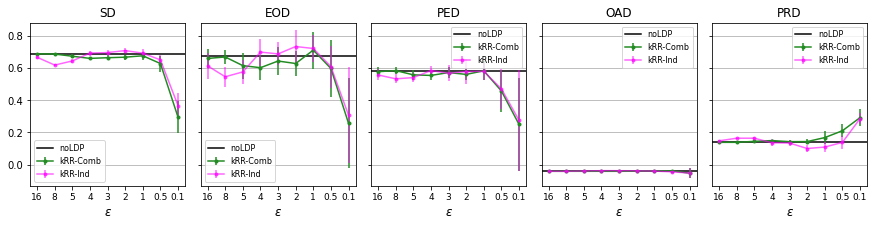

In [66]:
Make_subplots_2(lst_eps,'Synthetic1')

## Results for the third contribution: Impact of the outcome binarization on LDP-Fairness Tradeoff

In [50]:
def Make_subplots3(lst_eps,dataset_name):    
    fig2, ax2 = plt.subplots(5, 3, figsize=(10, 14),sharex='col', sharey=False)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.yticks(fontsize=5)
    #Fairness metric 1: Statistical Parity
    # Cutoff 1:
    ax2[0,0].axhspan(SP_maj_mean1, SP_min_mean1, facecolor ='lightgrey', alpha = 0.4)
    #ax2[0,0].axhline(y=SP_maj_mean1, color='black', label = 'A=1 (priv.): noLDP')
    #ax2[0,0].axhline(y=SP_min_mean1, color='black', linestyle='dashed',label = 'A=0 (priv.): noLDP')
    ax2[0,0].plot(sldp_sp_maj1, label = r'sLDP: $P[\hat{Y}=1|A=1]$', color='dodgerblue',linestyle='solid', marker='.',alpha=0.5)
    ax2[0,0].plot(sldp_sp_min1, label = r'sLDP: $P[\hat{Y}=1|A=0]$', color='dodgerblue',linestyle='dashed', marker='.')
    ax2[0,0].plot(allsldp_sp_maj1, label= r'kRR-Comb: $P[\hat{Y}=1|A=1]$', color='forestgreen',linestyle='solid', marker='.',alpha=0.5)
    ax2[0,0].plot(allsldp_sp_min1, label= r'kRR-Comb: $P[\hat{Y}=1|A=0]$', color='forestgreen', linestyle='dashed', marker='.')
    ax2[0,0].plot(ldp_ind_sp_maj1, label= r'kRR-Ind: $P[\hat{Y}=1|A=1]$', color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[0,0].plot(ldp_ind_sp_min1, label=r'kRR-Ind: $P[\hat{Y}=1|A=0]$', color='magenta', linestyle='dashed', marker='.')
    ax2[0,0].legend(bbox_to_anchor = (4.25,0.9) ,ncol=1,fontsize='8') 
    #ax2[0,0].legend(fontsize='8')
    # Cutoff 2:
    #ax2[0,1].axhline(y=SP_maj_mean2, color='black')
    #ax2[0,1].axhline(y=SP_min_mean2, color='black', linestyle='dashed')
    ax2[0,1].axhspan(SP_maj_mean2, SP_min_mean2, facecolor ='lightgrey', alpha = 0.4)
    ax2[0,1].plot(sldp_sp_maj2,color='dodgerblue',linestyle='solid', marker='.',alpha=0.5)
    ax2[0,1].plot(sldp_sp_min2,color='dodgerblue',linestyle='dashed', marker='.')
    ax2[0,1].plot(allsldp_sp_maj2, color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[0,1].plot(allsldp_sp_min2, color='forestgreen', linestyle='dashed', marker='.')
    ax2[0,1].plot(ldp_ind_sp_maj2, color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[0,1].plot(ldp_ind_sp_min2, color='magenta', linestyle='dashed', marker='.')
    #ax2[0,0].legend(fontsize='8')
    # Cutoff 3:
    #ax2[0,2].axhline(y=SP_maj_mean3, color='black')
    #ax2[0,2].axhline(y=SP_min_mean3, color='black', linestyle='dashed')
    ax2[0,2].axhspan(SP_maj_mean3, SP_min_mean3, facecolor ='lightgrey', alpha = 0.4)
    ax2[0,2].plot(sldp_sp_maj3, color='dodgerblue',linestyle='solid', marker='.',alpha=0.5)
    ax2[0,2].plot(sldp_sp_min3,  color='dodgerblue',linestyle='dashed', marker='.')
    ax2[0,2].plot(allsldp_sp_maj3,  color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[0,2].plot(allsldp_sp_min3,  color='forestgreen', linestyle='dashed', marker='.')
    ax2[0,2].plot(ldp_ind_sp_maj3, color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[0,2].plot(ldp_ind_sp_min3, color='magenta', linestyle='dashed', marker='.')
    ax2[0,0].set_ylabel('SD',fontsize=12) #r'$P[\hat{Y}=1|A=a]$'
    #ax2[0,0].legend(fontsize='8')
    
    #Fairness metric 2: Equal Opportunity
    # Cutoff 1:
    ax2[1,0].axhspan(EO_maj_mean1, EO_min_mean1, facecolor ='lightgrey', alpha = 0.4)
#     ax2[1,0].axhline(y=EO_maj_mean1, color='black')
#     ax2[1,0].axhline(y=EO_min_mean1, color='black', linestyle='dashdot')
    ax2[1,0].plot(sldp_eo_maj1,  label = r'sLDP: $P[\hat{Y}=1|Y=1,A=1]$',color='dodgerblue', linestyle='solid', marker='.',alpha=0.5)
    ax2[1,0].plot(sldp_eo_min1,  label = r'sLDP: $P[\hat{Y}=1|Y=1,A=0]$',color='dodgerblue',linestyle='dashed', marker='.')
    ax2[1,0].plot(allsldp_eo_maj1,  label = r'kRR-Comb: $P[\hat{Y}=1|Y=1,A=1]$',color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[1,0].plot(allsldp_eo_min1,  label = r'kRR-Comb: $P[\hat{Y}=1|Y=1,A=0]$',color='forestgreen', linestyle='dashed', marker='.')
    ax2[1,0].plot(ldp_ind_eo_maj1,  label = r'kRR-Ind: $P[\hat{Y}=1|Y=1,A=1]$',color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[1,0].plot(ldp_ind_eo_min1, label = r'kRR-Ind: $P[\hat{Y}=1|Y=1,A=0]$',color='magenta', linestyle='dashed', marker='.')
    ax2[1,0].legend(bbox_to_anchor = (4.4,0.9) ,ncol=1,fontsize='8')  
    #ax2[1,0].legend(fontsize='8')
    # Cutoff 2:
#     ax2[1,1].axhline(y=EO_maj_mean2, color='black')
#     ax2[1,1].axhline(y=EO_min_mean2, color='black', linestyle='dashed')
    ax2[1,1].axhspan(EO_maj_mean2, EO_min_mean2, facecolor ='lightgrey', alpha = 0.4)
    ax2[1,1].plot(sldp_eo_maj2,  color='dodgerblue', linestyle='solid', marker='.',alpha=0.5)
    ax2[1,1].plot(sldp_eo_min2,  color='dodgerblue',linestyle='dashed', marker='.')
    ax2[1,1].plot(allsldp_eo_maj2,  color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[1,1].plot(allsldp_eo_min2,  color='forestgreen', linestyle='dashed', marker='.')
    ax2[1,1].plot(ldp_ind_eo_maj2, color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[1,1].plot(ldp_ind_eo_min2, color='magenta', linestyle='dashed', marker='.')
    #ax2[1,1].legend(fontsize='8')
    # Cutoff 3:
#     ax2[1,2].axhline(y=EO_maj_mean3, color='black')
#     ax2[1,2].axhline(y=EO_min_mean3, color='black', linestyle='dashed')
    ax2[1,2].axhspan(EO_maj_mean3, EO_min_mean3, facecolor ='lightgrey', alpha = 0.4)
    ax2[1,2].plot(sldp_eo_maj3,  color='dodgerblue', linestyle='solid', marker='.',alpha=0.5)
    ax2[1,2].plot(sldp_eo_min3,  color='dodgerblue',linestyle='dashed', marker='.')
    ax2[1,2].plot(allsldp_eo_maj3,  color='forestgreen', linestyle='solid',marker='.',alpha=0.5)
    ax2[1,2].plot(allsldp_eo_min3,  color='forestgreen', linestyle='dashed', marker='.')
    ax2[1,2].plot(ldp_ind_eo_maj3, color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[1,2].plot(ldp_ind_eo_min3, color='magenta', linestyle='dashed', marker='.')
    ax2[1,0].set_ylabel('EOD',fontsize=12) #r'$P[\hat{Y}=1|A=a,Y=1]$'
    #ax2[1,2].legend(fontsize='8')
    
    #Fairness metric 3: Predictive Equality
    # Cutoff 1:
#     ax2[2,0].axhline(y=PE_maj_mean1, color='black')
#     ax2[2,0].axhline(y=PE_min_mean1, color='black', linestyle='dashed')
    ax2[2,0].axhspan(PE_maj_mean1, PE_min_mean1, facecolor ='lightgrey', alpha = 0.4)
    ax2[2,0].plot(sldp_pe_maj1, label = r'sLDP: $P[\hat{Y}=1|Y=0,A=1]$',color='dodgerblue', linestyle='solid', marker='.',alpha=0.5)
    ax2[2,0].plot(sldp_pe_min1, label = r'sLDP: $P[\hat{Y}=1|Y=0,A=0]$',color='dodgerblue',linestyle='dashed', marker='.')
    ax2[2,0].plot(allsldp_pe_maj1, label = r'kRR-Comb: $P[\hat{Y}=1|Y=0,A=1]$',color='forestgreen', linestyle='solid',marker='.',alpha=0.5)
    ax2[2,0].plot(allsldp_pe_min1, label = r'kRR-Comb: $P[\hat{Y}=1|Y=0,A=0]$',color='forestgreen', linestyle='dashed', marker='.')
    ax2[2,0].plot(ldp_ind_pe_maj1, label = r'kRR-Ind: $P[\hat{Y}=1|Y=0,A=1]$',color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[2,0].plot(ldp_ind_pe_min1,label = r'kRR-Ind: $P[\hat{Y}=1|Y=0,A=0]$',color='magenta', linestyle='dashed', marker='.')
    ax2[2,0].legend(bbox_to_anchor = (4.4,0.9) ,ncol=1,fontsize='8')
    #ax2[2,0].legend(fontsize='8')

    # Cutoff 2:
#     ax2[2,1].axhline(y=PE_maj_mean2, color='black')
#     ax2[2,1].axhline(y=PE_min_mean2, color='black', linestyle='dashed')
    ax2[2,1].axhspan(PE_maj_mean2, PE_min_mean2, facecolor ='lightgrey', alpha = 0.4)
    ax2[2,1].plot(sldp_pe_maj2,  color='dodgerblue', linestyle='solid', marker='.',alpha=0.5)
    ax2[2,1].plot(sldp_pe_min2,  color='dodgerblue',linestyle='dashed', marker='.')
    ax2[2,1].plot(allsldp_pe_maj2,  color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[2,1].plot(allsldp_pe_min2,  color='forestgreen', linestyle='dashed', marker='.',alpha=0.5)
    ax2[2,1].plot(ldp_ind_pe_maj2, color='magenta',linestyle='solid', marker='.')
    ax2[2,1].plot(ldp_ind_pe_min2, color='magenta', linestyle='dashed', marker='.')
    #ax2[2,1].legend(fontsize='8')

    # Cutoff 3
#     ax2[2,2].axhline(y=PE_maj_mean3, color='black')
#     ax2[2,2].axhline(y=PE_min_mean3, color='black', linestyle='dashed')
    ax2[2,2].axhspan(PE_maj_mean3, PE_min_mean3, facecolor ='lightgrey', alpha = 0.4)
    ax2[2,2].plot(sldp_pe_maj3,  color='dodgerblue', linestyle='solid', marker='.',alpha=0.5)
    ax2[2,2].plot(sldp_pe_min3,  color='dodgerblue',linestyle='dashed', marker='.')
    ax2[2,2].plot(allsldp_pe_maj3,  color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[2,2].plot(allsldp_pe_min3,  color='forestgreen', linestyle='dashed', marker='.')
    ax2[2,2].plot(ldp_ind_pe_maj3, color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[2,2].plot(ldp_ind_pe_min3, color='magenta', linestyle='dashed', marker='.')
    ax2[2,0].set_ylabel('PED',fontsize=12) #r'$P[\hat{Y}=1|A=a,Y=0]$'
    #ax2[2,2].legend(fontsize='8')
    
    #Fairness metric 4: Overall Accuracy
    # Cutoff 1:
#     ax2[3,0].axhline(y=OA_maj_mean1, color='black',label='A=1')
#     ax2[3,0].axhline(y=OA_min_mean1, color='black', linestyle='dashed',label='A=0')
    ax2[3,0].axhspan(OA_maj_mean1, OA_min_mean1, facecolor ='lightgrey', alpha = 0.4)
    ax2[3,0].plot(sldp_oa_maj1, label = r'sLDP: $P[\hat{Y}=Y|A=1]$', color='dodgerblue',linestyle='solid', marker='.',alpha=0.5)
    ax2[3,0].plot(sldp_oa_min1,  label = r'sLDP: $P[\hat{Y}=Y|A=1]$', color='dodgerblue',linestyle='dashed', marker='.')
    ax2[3,0].plot(allsldp_oa_maj1,  label = r'kRR-Comb: $P[\hat{Y}=Y|A=1]$', color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[3,0].plot(allsldp_oa_min1,  label = r'kRR-Comb: $P[\hat{Y}=Y|A=1]$', color='forestgreen', linestyle='dashed', marker='.')
    ax2[3,0].plot(ldp_ind_oa_maj1, label = r'kRR-Ind: $P[\hat{Y}=Y|A=1]$', color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[3,0].plot(ldp_ind_oa_min1, label = r'kRR-Ind: $P[\hat{Y}=Y|A=1]$', color='magenta', linestyle='dashed', marker='.')
    ax2[3,0].legend(bbox_to_anchor = (4.25,0.9) ,ncol=1,fontsize='8')
    #ax2[3,0].legend(fontsize='8')
    # Cutoff 2:
#     ax2[3,1].axhline(y=OA_maj_mean2, color='black')
#     ax2[3,1].axhline(y=OA_min_mean2, color='black', linestyle='dashed')
    ax2[3,1].axhspan(OA_maj_mean2, OA_min_mean2, facecolor ='lightgrey', alpha = 0.4)
    ax2[3,1].plot(sldp_oa_maj2,  color='dodgerblue',linestyle='solid', marker='.',alpha=0.5)
    ax2[3,1].plot(sldp_oa_min2, color='dodgerblue', linestyle='dashed', marker='.')
    ax2[3,1].plot(allsldp_oa_maj2,  color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[3,1].plot(allsldp_oa_min2,  color='forestgreen', linestyle='dashed', marker='.')
    ax2[3,1].plot(ldp_ind_oa_maj2, color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[3,1].plot(ldp_ind_oa_min2, color='magenta', linestyle='dashed', marker='.')
    #ax2[3,1].legend(fontsize='8')
    # Cutoff 3:
#     ax2[3,2].axhline(y=OA_maj_mean3, color='black')
#     ax2[3,2].axhline(y=OA_min_mean3, color='black', linestyle='dashed')
    ax2[3,2].axhspan(OA_maj_mean3, OA_min_mean3, facecolor ='lightgrey', alpha = 0.4)
    ax2[3,2].plot(sldp_oa_maj3,  color='dodgerblue',linestyle='solid', marker='.',alpha=0.5)
    ax2[3,2].plot(sldp_oa_min3, color='dodgerblue', linestyle='dashed', marker='.')
    ax2[3,2].plot(allsldp_oa_maj3,  color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[3,2].plot(allsldp_oa_min3,  color='forestgreen', linestyle='dashed', marker='.',alpha=0.5)
    ax2[3,2].plot(ldp_ind_oa_maj3, color='magenta',linestyle='solid', marker='.')
    ax2[3,2].plot(ldp_ind_oa_min3, color='magenta', linestyle='dashed', marker='.')
    ax2[3,0].set_ylabel('OAD',fontsize=12)  #r'$P[\hat{Y}=Y|A=a]$'
    #ax2[3,2].legend(fontsize='8')
    
    #Fairness metric 5: Predictive Parity
    # Cutoff 1:
#     ax2[4,0].axhline(y=PRP_maj_mean1, color='black')
#     ax2[4,0].axhline(y=PRP_min_mean1, color='black', linestyle='dashed')
    ax2[4,0].axhspan(PRP_maj_mean1, PRP_min_mean1, facecolor ='lightgrey', alpha = 0.4)
    ax2[4,0].plot(sldp_prp_maj1,  label = r'sLDP: $P[Y=1|\hat{Y}=1,A=1]$', color='dodgerblue', linestyle='solid', marker='.',alpha=0.5)
    ax2[4,0].plot(sldp_prp_min1,  label = r'sLDP: $P[Y=1|\hat{Y}=1,A=0]$', color='dodgerblue',linestyle='dashed', marker='.')
    ax2[4,0].plot(allsldp_prp_maj1,  label = r'kRR-Comb: $P[Y=1|\hat{Y}=1,A=1]$', color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[4,0].plot(allsldp_prp_min1,  label = r'kRR-Comb: $P[Y=1|\hat{Y}=1,A=0]$', color='forestgreen', linestyle='dashed', marker='.')
    ax2[4,0].plot(ldp_ind_prp_maj1,  label = r'kRR-Ind: $P[Y=1|\hat{Y}=1,A=1]$', color='magenta',linestyle='solid',marker='.',alpha=0.5)
    ax2[4,0].plot(ldp_ind_prp_min1, label = r'kRR-Ind: $P[Y=1|\hat{Y}=1,A=0]$', color='magenta', linestyle='dashed', marker='.')
    ax2[4,0].legend(bbox_to_anchor = (4.4,0.9) ,ncol=1,fontsize='8')
    #ax2[4,0].legend(fontsize='8')
  
    # Cutoff 2:
#     ax2[4,1].axhline(y=PRP_maj_mean2, color='black')
#     ax2[4,1].axhline(y=PRP_min_mean2, color='black', linestyle='dashed')
    ax2[4,1].axhspan(PRP_maj_mean2, PRP_min_mean2, facecolor ='lightgrey', alpha = 0.4)
    ax2[4,1].plot(sldp_prp_maj2,  color='dodgerblue', linestyle='solid', marker='.',alpha=0.5)
    ax2[4,1].plot(sldp_prp_min2,  color='dodgerblue',linestyle='dashed', marker='.')
    ax2[4,1].plot(allsldp_prp_maj2,  color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[4,1].plot(allsldp_prp_min2,  color='forestgreen', linestyle='dashed', marker='.')
    ax2[4,1].plot(ldp_ind_prp_maj2, color='magenta',linestyle='solid', marker='.',alpha=0.5)
    ax2[4,1].plot(ldp_ind_prp_min2, color='magenta', linestyle='dashed', marker='.')
    #ax2[4,1].legend(fontsize='8')

    # Cutoff 3:
#     ax2[4,2].axhline(y=PRP_maj_mean3, color='black')
#     ax2[4,2].axhline(y=PRP_min_mean3, color='black', linestyle='dashed')
    ax2[4,2].axhspan(PRP_maj_mean3, PRP_min_mean3, facecolor ='lightgrey', alpha = 0.4)
    ax2[4,2].plot(sldp_prp_maj3,  color='dodgerblue', linestyle='solid', marker='.',alpha=0.5)
    ax2[4,2].plot(sldp_prp_min3,  color='dodgerblue',linestyle='dashed', marker='.')
    ax2[4,2].plot(allsldp_prp_maj3,  color='forestgreen', linestyle='solid', marker='.',alpha=0.5)
    ax2[4,2].plot(allsldp_prp_min3,  color='forestgreen', linestyle='dashed', marker='.')
    ax2[4,2].plot(ldp_ind_prp_maj3, color='magenta',linestyle='solid',marker='.',alpha=0.5)
    ax2[4,2].plot(ldp_ind_prp_min3, color='magenta', linestyle='dashed', marker='.')
    ax2[4,0].set_ylabel('PRD',fontsize=12) #r'$P[Y=1|A=a,\hat{Y}=1]$'
    #ax2[4,2].legend(fontsize='8')
        
    ax2[0,0].set_title('Threshold = Q1',fontsize=11)
    ax2[0,1].set_title('Threshold = Q2',fontsize=11)
    ax2[0,2].set_title('Threshold = Q3',fontsize=11)


    for i in range(5):
        for j in range(3):
            ax2[i, j].set_xticks(range(len(lst_eps)))        
            ax2[i, j].set_xticklabels(lst_eps,fontsize=10)
            ax2[4, j].set_xlabel('$\epsilon$', fontsize=12)
            ax2[i, j].grid(axis='y')
            ax2[i, j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #ax2[0,0].legend(loc = 'upper right',bbox_to_anchor = (2.6,1.5) ,ncol=3,fontsize='12')        
    # saving the plot as a pdf file
    fig2.savefig(path_results + dataset + '_thresh_impact.pdf',dpi=100,bbox_inches='tight')
    
    return fig2.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


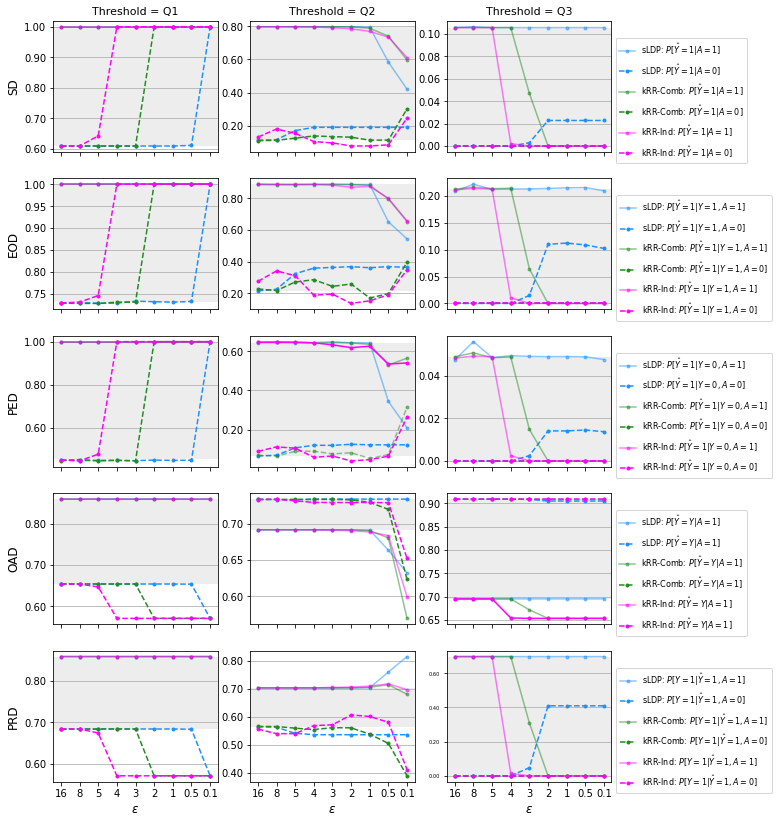

In [51]:
#lst_eps = [16,8,5,4,3,2.9,2.8,2.7,2.6,2.5,2.4,2.3,2.2,2.1,2,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
Make_subplots3(lst_eps,'Synthetic1')

In [ ]:
EO_maj_mean1